In [1]:
import cv2
import matplotlib.pyplot as plt

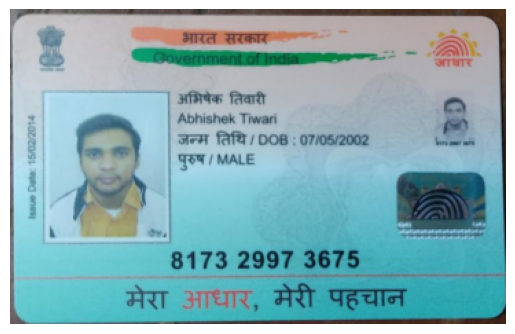

In [2]:
# Load the image
img_path='data\id_image_preprocessed.png'
img = cv2.imread(img_path)

# displaying image using matplotlib
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.axis('off')
plt.show()

In [3]:
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

## Face detection using Haar-Cascade

In [4]:
cascade_path = 'model\haarcascade_frontalface_alt.xml'

In [5]:
# Load the Haar cascade classifier
face_cascade = cv2.CascadeClassifier(cascade_path)
# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)

In [6]:
faces

array([[45, 85, 51, 51]])

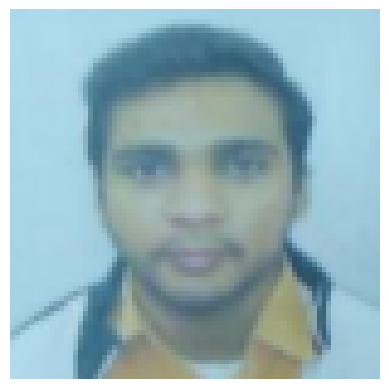

In [7]:
# Find the face with the largest area
max_area = 0
largest_face = None
for (x, y, w, h) in faces:
    area = w * h
    if area > max_area:
        max_area = area
        largest_face = (x, y, w, h)

# Extract the largest face
if largest_face is not None:
    (x, y, w, h) = largest_face
    # extracted_face = img[y:y+h, x:x+w]
    
    # Increase dimensions by 15%
    new_w = int(w * 1.50)
    new_h = int(h * 1.50)
    
    # Calculate new (x, y) coordinates to keep the center of the face the same
    new_x = max(0, x - int((new_w - w) / 2))
    new_y = max(0, y - int((new_h - h) / 2))

    # Extract the enlarged face
    extracted_face = rgb_img[new_y:new_y+new_h, new_x:new_x+new_w]

plt.imshow(extracted_face)
plt.axis('off')
plt.show()

In [8]:
# ## Save the extracted image
# extracted_face_rgb = cv2.cvtColor(extracted_face, cv2.COLOR_BGR2RGB)
# extracted_face_path = 'data\extracted_face_image.png'
# cv2.imwrite(extracted_face_path, extracted_face_rgb)